In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from Bio import SeqIO
import customfunc
import matrix

In [2]:
#!abricate ~/documentos/sentinel/genomasbrasil/*.gbff --db argannot --noheader --threads 12 > ~/documentos/github/ARG-Sentinel/spreadsheets/argannot_br.csv

In [3]:
#!abricate ~/documentos/sentinel/genomasbrasil/*.gbff --db plasmidfinder --noheader --threads 12 > ~/documentos/github/ARG-Sentinel/spreadsheets/plasmidfinder_br.csv

## **LOAD DATAFRAMES**
<p style='text-align: justify;'>
<b>Catálogo:</b>  registo dos genomas brasileiros baixados do NCBI. Contem informações quanto a local, data e fonte de coleta, hospedeiro, especies (e cepa) e presenta de plasmídeo <br />
<b>ARG-Annot:</b> ARGs encontrados via consulta do ARG-Annot <br />
<b>Plasmidfinder</b> Genes de plasmídeos encontrados via consulta no plasmidfinder
</p>

In [4]:
#Catalog of genomes colected from Brazil
catalog = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/catalogo_teste.csv")
catalog.head()

,accession,colection_date,host,source,coord,country,organism,strain,plasmid
0,GCF_002113285.1_ASM211328v1_genomic.gbff,May-2014,Na,bulk soil from sugarcane field,22.7 S 47.6 W,Brazil,Pseudomonas sp. B11(2017),B11(2017),Na
1,GCA_004369765.1_ASM436976v1_genomic.gbff,Mar-2017,Oreochromis niloticus,brain,Na,Brazil,Streptococcus agalactiae,SA22AQUAVET,Na
2,GCA_001267925.1_ASM126792v1_genomic.gbff,2006,wheat root,surface-sterilized wheat roots,Na,"Germany: Oberpfalz, Neumarkt",Herbaspirillum hiltneri N3,N3,Na
3,GCA_007097455.1_ASM709745v1_genomic.gbff,2011,Homo sapiens,urine,Na,Brazil,Corynebacterium aurimucosum,2271,Na
4,GCF_002029925.1_ASM202992v1_genomic.gbff,Feb-2017,Canis lupus familiaris,ear,23.954 S 46.3355 W,Brazil: Sao Paulo,Pseudomonas aeruginosa,ICBDVIM-2,Na


In [5]:
#ARG-Annot database genes
argannot = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/argannot_br.csv", sep = '\t', names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
argannot['file'] = argannot['file'].apply(lambda x: x.split('/')[-1])
argannot = customfunc.filldf(argannot,catalog)
argannot.reset_index(inplace = True)
argannot.head()

,file,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,...,product,resistance,colection_date,host,source,coordenates,country,organism,strain,plasmid
0,GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,332863,335022,-,(Bla)PBP1a,1-2160/2160,========/======,2/2,99.95,...,(Bla)PBP1a,NaN,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
1,GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,1886036,1888501,-,(Bla)PBP1b,1-2466/2466,===============,0/0,100.00,...,(Bla)PBP1b,NaN,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
2,GCA_000195475.2_ASM19547v2_genomic.gbff,AEQS01000199,25156,25620,+,(Tet)tet(34),1-465/465,===============,0/0,100.00,...,(Tet)tet(34),NaN,Na,Na,diseased coral,Na,Na,Vibrio coralliilyticus P1,P1,Na
3,GCA_000252345.2_ASM25234v2_genomic.gbff,AHYY01000002,1470382,1471490,+,(Tet)tet(35),1-1109/1110,===============,0/0,99.91,...,(Tet)tet(35),NaN,Na,Na,open ocean,Na,Brazil: Abrolhos Bank,Vibrio campbellii PEL22A,PEL22A,Na
4,GCA_000252345.2_ASM25234v2_genomic.gbff,AHYY01000002,2020421,2020878,-,(Tet)tet(34),8-465/465,===============,0/0,98.49,...,(Tet)tet(34),NaN,Na,Na,open ocean,Na,Brazil: Abrolhos Bank,Vibrio campbellii PEL22A,PEL22A,Na


In [6]:
#Plasmidfinder database genes
plasmidfinder = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/plasmidfinder_br.csv",sep = "\t", names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
plasmidfinder['file'] = plasmidfinder['file'].apply(lambda x: x.split('/')[-1])
plasmidfinder = customfunc.filldf(plasmidfinder, catalog)
plasmidfinder.reset_index(inplace = True)
plasmidfinder.head()

,file,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,...,product,resistance,colection_date,host,source,coordenates,country,organism,strain,plasmid
0,GCA_000255495.2_ASM25549v2_genomic.gbff,AHYZ01000091,1434,2363,-,rep28_1_repA(pCIS4),1-930/930,===============,0/0,100.00,...,rep28_1_repA(pCIS4)_CP003162,NaN,Na,Na,Na,Na,Na,Lactobacillus vini DSM 20605,DSM 20605,Na
1,GCA_000255515.2_ASM25551v2_genomic.gbff,AHZA01000321,2225,3154,-,rep28_1_repA(pCIS4),1-930/930,===============,0/0,100.00,...,rep28_1_repA(pCIS4)_CP003162,NaN,2008,Na,distillery Japungu of norteast Brazil,Na,Brazil: Santa Rita,Lactobacillus vini JP7.8.9,JP7.8.9,Na
2,GCA_000255515.2_ASM25551v2_genomic.gbff,AHZA01000400,1,956,+,repUS64_1_repA(pR18),2-954/954,========/======,7/15,99.27,...,repUS64_1_repA(pR18)_JN601038,NaN,2008,Na,distillery Japungu of norteast Brazil,Na,Brazil: Santa Rita,Lactobacillus vini JP7.8.9,JP7.8.9,Na
3,GCA_001400055.1_ASM140005v1_genomic.gbff,LKGR01000015,63800,64800,+,rep9c_1_repA(pTW9),8-1008/1008,========/======,3/4,99.11,...,rep9c_1_repA(pTW9)_AB563188,NaN,14-Oct-2013,Spheniscus magellanicus (magellanic penguin),feces,30.1 S 50.12 W,"Brazil: Cidreira, Rio Grande do Sul",Enterococcus faecalis,P8-1,Na
4,GCA_001400055.1_ASM140005v1_genomic.gbff,LKGR01000026,6007,6944,-,rep11a_1_repA(pB82),1-938/945,===============,0/0,99.26,...,rep11a_1_repA(pB82)_AB178871,NaN,14-Oct-2013,Spheniscus magellanicus (magellanic penguin),feces,30.1 S 50.12 W,"Brazil: Cidreira, Rio Grande do Sul",Enterococcus faecalis,P8-1,Na


## Brazil resistome profile 

In [7]:
argannot['class'] = argannot['gene'].apply(lambda x: x.split(')')[0]).apply(lambda y: y.split('(')[1]) #Creating the "class" column
profile = argannot[['organism','class']].set_index('organism')#take importa columns
profile = pd.get_dummies(profile).groupby(level = 0).sum()
profile.head()

,class_AGly,class_Bla,class_Col,class_Fcd,class_Fcyn,class_Flq,class_Gly,class_MLS,class_Phe,class_Rif,class_Sul,class_Tet,class_Tmt
organism,,,,,,,,,,,,,
Acinetobacter baumannii,132.0,210.0,0.0,0.0,0.0,0.0,0.0,11.0,31.0,0.0,17.0,0.0,16.0
Acinetobacter pittii,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acinetobacter seifertii,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Actinobacillus suis,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Actinobaculum suis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,3.0,0.0


Text(86.99999999999999, 0.5, '')

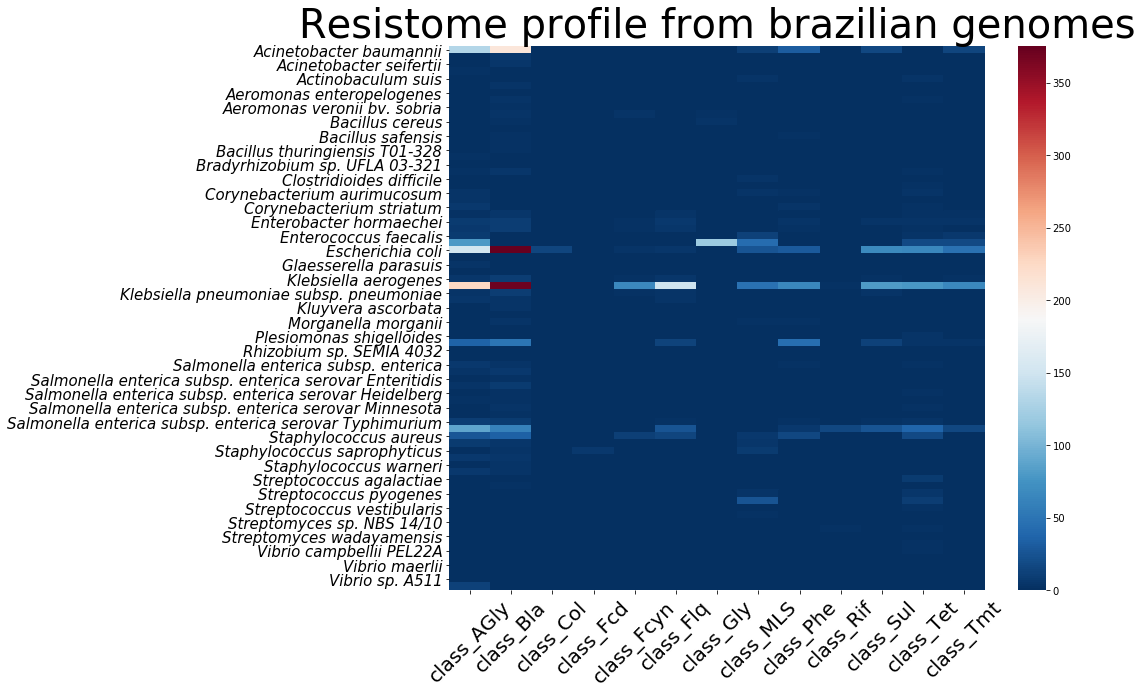

In [8]:
plt.figure(figsize = (12,10))
sns.heatmap(profile, cmap = "RdBu_r")
plt.title('Resistome profile from brazilian genomes', fontsize = 40, y = .8)
plt.colormaps()
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 15, fontstyle = 'italic')
plt.ylabel('')
#plt.savefig('heatmapmap_classes_argannot.png', bbox_inches = 'tight',dpi = 600)

## Retirar genomas para construção de filogenias

## Sets

## Diagrama de Veen: procurar por elementos moveis

## Encontrar plasmídeos

# Co-ocorrência entre patôgenos humanos e não humanos (ou bactérias de vida livre)
<p>
    Alguns estudos mostraram que bactérias patogênicas que não infectam humanos ou, ainda, as não potogênicas são potênciais reservatorórios de ARGs devido ao contato com antibióticos fora da área médica. <br /> 
    <b>Objetivo:</b> encontrar espécies de interesse clínico e checar se elas compartilham genes de resistência com grupos não patogênicos ou patogênos de outros animais/plantas.<br />
    <br />
<b>Lista de interesse: patôgenos ESKAPE +  E.coli</b>  
    <ul>
        <li> Enterococcus faecium   [Presente] </li>
        <li> Staphylococcus aureus  [Presente] </li>
        <li> Klebsiella pneumoniae  [Presente]</li>
        <li> Acinetobacter baumannii[Presente]</li>
        <li> Pseudomonas aeruginosa [Presente]</li>
        <li> Enterobacter spp       [Presente :cloacae, kobei e  hormaechei]</li>
        <li> Escherichia coli       [Presente]</li>
    </ul>
    
</p>

[ESKAPE](https://en.wikipedia.org/wiki/ESKAPE)

# **Passo 1:** selecionar os patôgenos humanos de interesse

In [9]:
#lista de patôgenos de interesse
eskape = ['Enterococcus faecium',
          'Staphylococcus aureus',
          'Klebsiella pneumoniae',
          'Acinetobacter baumannii',
          'Pseudomonas aeruginosa',
          'Enterobacter cloacae',
          'Enterobacter kobei',
          'Enterobacter hormaechei',
          'Escherichia coli']

# **Passo 1.1:** limpar o banco de dados. Deixar apenas aqueles genomas com dados de coleta completos

In [10]:
args_spread = argannot[['gene','coordenates','colection_date','country','file','sequence','strand','start','end','organism','plasmid']].query("coordenates != 'Na'").query("colection_date != 'Na' ").query("country != 'Na'")
args_spread = args_spread.set_index('country').filter(like = 'Brazil',axis = 0)
args_spread["year"] = pd.to_datetime(args_spread.colection_date.values).year
args_spread.colection_date  = args_spread.colection_date.apply(lambda x: customfunc.SwitchMonths(x))
customfunc.SplitCoords(args_spread,"lat")
args_spread['lat'] = args_spread.lat.apply(lambda x: customfunc.NumCoord(x))
customfunc.SplitCoords(args_spread,"lon")
args_spread['lon'] = args_spread.lon.apply(lambda x: customfunc.NumCoord(x))
args_spread.head()

,gene,coordenates,colection_date,file,sequence,strand,start,end,organism,plasmid,year,lat,lon
country,,,,,,,,,,,,,
Brazil: Parana,(Bla)blaTRU-1,25.42778 S 49.27306 W,1999,GCA_000687355.2_ASM68735v2_genomic.gbff,JMGO02000003,-,605273,606421,Aeromonas enteropelogenes,Na,1999,-25.42778,-49.27306
Brazil: Curitiba,(Bla)blaMOX-6,25.4455 S 49.2393 W,17/12/2010,GCA_000959705.2_ASM95970v2_genomic.gbff,CP024198,+,1164689,1165840,Aeromonas caviae,Na,2010,-25.44550,-49.23930
"Brazil: Cidreira, Rio Grande do Sul",(MLS)mph(D),30.1 S 50.12 W,14/10/2013,GCA_001400055.1_ASM140005v1_genomic.gbff,LKGR01000003,-,201956,202789,Enterococcus faecalis,Na,2013,-30.10000,-50.12000
"Brazil: Cidreira, Rio Grande do Sul",(Tmt)dfrE,30.1 S 50.12 W,14/10/2013,GCA_001400055.1_ASM140005v1_genomic.gbff,LKGR01000005,+,65757,66251,Enterococcus faecalis,Na,2013,-30.10000,-50.12000
"Brazil: Cidreira, Rio Grande do Sul",(MLS)lsa(A),30.1 S 50.12 W,14/10/2013,GCA_001400055.1_ASM140005v1_genomic.gbff,LKGR01000013,-,5573,7069,Enterococcus faecalis,Na,2013,-30.10000,-50.12000


**Quais ARGs aparecem mais?**

In [11]:
#info sobre args_spread
print(f"Total de {len(args_spread)} ARGs coletados com coordenadas. {len(set(args_spread.gene))} distintos")

Total de 1386 ARGs coletados com coordenadas. 212 distintos


# **Passo 2:** encontrar ARGs presentes nos patógenos ESKAPE dos nossos genomas. 

In [33]:
ente_fae = args_spread.query(f"organism == 'Enterococcus faecium'")
len(ente_fae)

50

In [34]:
stap_au = args_spread.query(f"organism == 'Staphylococcus aureus'")
len(stap_au)

59

In [35]:
kleb_pneu = args_spread.query(f"organism == 'Klebsiella pneumoniae'")
len(kleb_pneu)

278

In [36]:
aci_bau = args_spread.query("organism == 'Acinetobacter baumannii'")
len(aci_bau)

31

In [37]:
pseu_ae = args_spread.query("organism == 'Pseudomonas aeruginosa'")
len(pseu_ae)

32

In [38]:
ent_clo = args_spread.query("organism == 'Enterobacter cloacae'")
len(ent_clo)

17

In [39]:
ent_ko = args_spread.query("organism == 'Enterobacter kobei'")
len(ent_ko)

29

In [40]:
e_coli = args_spread.query("organism == 'Escherichia coli'")
len(e_coli)

629

# **Passo 3:** checar a existência desses mesmos ARGs em bactérias ambientais

<p style='text-align: justify;'> 
    Como pesquisar a movimentação dos ARGs pelo território nacional?<br />
    Preciso unir das informações: ano de coleta da amostra, coordenada e linhagens onde esses ARGs aparecem. <br />
    Figura resultante: um mapa do Brasil com grafo sobreposto.
</p>

## Lista de bactérias ambientais
<b>Lista de interesse: patôgenos ESKAPE +  E.coli</b>  
    <ul>
        <li>Enterococcus faecium</li>
        <li>Francisella noatunensis subsp. orientalis</li>
        <li>Vibrio coralliilyticus</li>
        <li>Vibrio campbellii PEL22A</li>
        <li>Bacillus safensis</li>
        <li>Enterococcus faecalis</li>
    </ul>

In [51]:
print(f"Tamanho do ARG-ANNOT: {len(argannot)}")

Tamanho do ARG-ANNOT: 3788


In [52]:
eskape_df = argannot.set_index("organism").loc[eskape]
print(f"Tamanho data frame com os patogênos ESKAPE + E.COLI :{len(eskape_df)}")

Tamanho data frame com os patogênos ESKAPE + E.COLI :3015


In [53]:
argannot_no_eskape = argannot.set_index("organism").drop(eskape)
print(f" tamanho dos ARG-Annot sem os ESKAPE: {len(argannot_no_eskape)}")

 tamanho dos ARG-Annot sem os ESKAPE: 773


<p style='text-align: justify;'>
    A maioria dos ARGs encontrados pertence ao grupo ESKAPE. Provavelmente devido ao grande número de estudos envolvendo essas espécies.
</p>

In [50]:
for c in argannot_no_eskape.itertuples():
    print(c.Index)

Streptococcus pneumoniae R6
Streptococcus pneumoniae R6
Vibrio coralliilyticus P1
Vibrio campbellii PEL22A
Vibrio campbellii PEL22A
Vibrio campbellii PEL22A
Vibrio campbellii DS40M4
Vibrio campbellii DS40M4
Vibrio campbellii DS40M4
Bacillus safensis
Bacillus safensis
Aeromonas enteropelogenes
Streptomyces wadayamensis
Streptomyces wadayamensis
Streptomyces wadayamensis
Aeromonas caviae
Corynebacterium striatum
Francisella noatunensis subsp. orientalis
Enterococcus faecalis
Enterococcus faecalis
Enterococcus faecalis
Enterococcus faecalis
Enterococcus faecalis
Salmonella enterica subsp. enterica serovar Infantis
Salmonella enterica subsp. enterica serovar Infantis
Salmonella enterica subsp. enterica serovar Infantis
Salmonella enterica subsp. enterica serovar Infantis
Clostridioides difficile
Clostridioides difficile
Clostridioides difficile
Clostridioides difficile
Serratia marcescens
Serratia marcescens
Serratia marcescens
Serratia marcescens
Serratia marcescens
Serratia marcescens
Se

In [23]:
args_spread.gene.value_counts().head(30)

(Bla)Penicillin_Binding_Protein_Ecoli    86
(Bla)ampH_Ecoli                          61
(Bla)AmpC2_Ecoli                         58
(Bla)AmpC1_Ecoli                         51
(Sul)sul2                                38
(Sul)sul1                                37
(AGly)strA                               35
(AGly)strB                               35
(Tet)tetR                                33
(Tet)tetA                                32
(Bla)blaCTX-M-15                         26
(AGly)aadA1-pm                           26
(Bla)blaTEM-105                          25
(Flq)OqxA                                24
(Flq)OqxBgb                              23
(Bla)ampH                                21
(AGly)aadA2                              21
(Tet)tetB                                21
(Tet)tetM                                20
(Fcyn)FosA6                              17
(MLS)erm(B)                              17
(MLS)mph(A)                              17
(Tmt)dfrA17                     

In [24]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

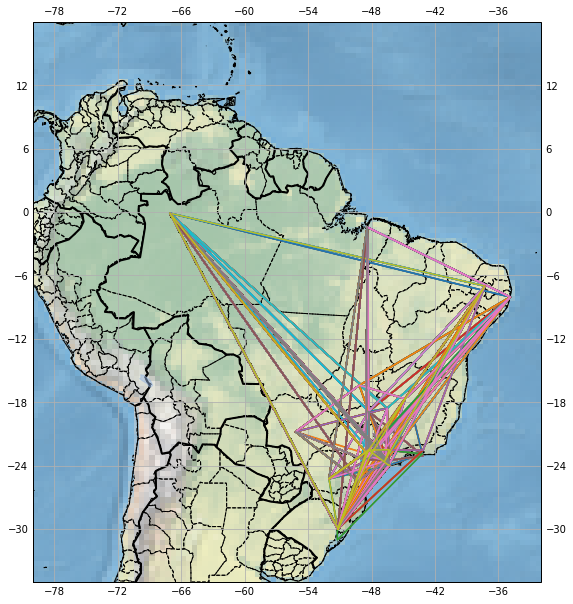

In [25]:
## MAPA DE E.COLI 

#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 18], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)

#Adicionar os genes
for c in e_coli.itertuples():
    plt.plot(args_spread.query(f"gene == '{c.gene}'").sort_values("year").lon,
             args_spread.query(f"gene == '{c.gene}'").sort_values("year").lat)

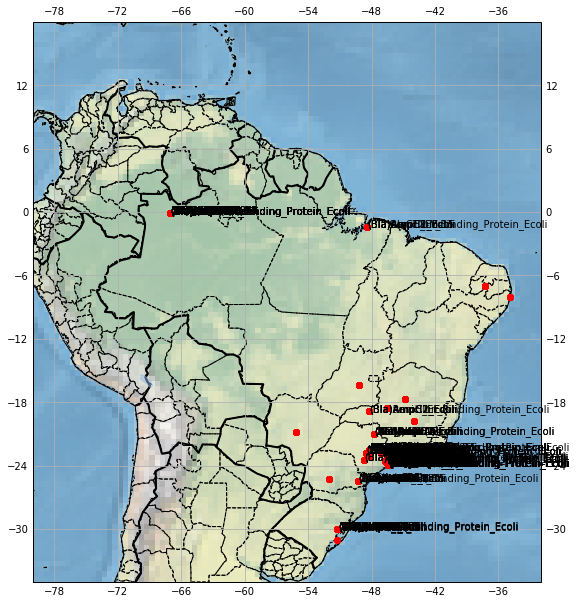

In [26]:
## MAPA DE E.COLI 

#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 18], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)

#Adicionar os genes
for c in e_coli.itertuples():
    plt.plot(args_spread.query(f"gene == '{c.gene}'").sort_values("year").lon,
             args_spread.query(f"gene == '{c.gene}'").sort_values("year").lat,
             linewidth = 1,
             linestyle = '',
             color  = 'r',
             marker = 'o',
             transform = ccrs.Geodetic())
    plt.text(c.lon, c.lat, c.gene)

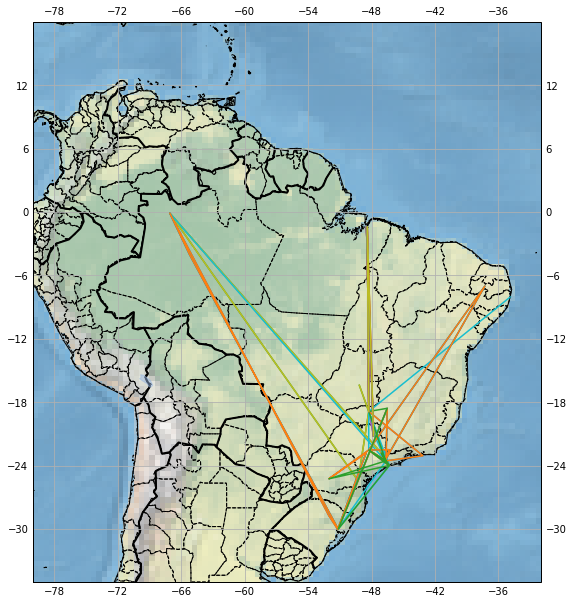

In [27]:
## MAPA DE ENTEROCOCCUS FAECIUM

#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 18], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)

#Adicionar os genes
for c in aci_bau.itertuples():
    plt.plot(args_spread.query(f"gene == '{c.gene}'").sort_values("year").lon,
             args_spread.query(f"gene == '{c.gene}'").sort_values("year").lat,
             transform = ccrs.Geodetic())

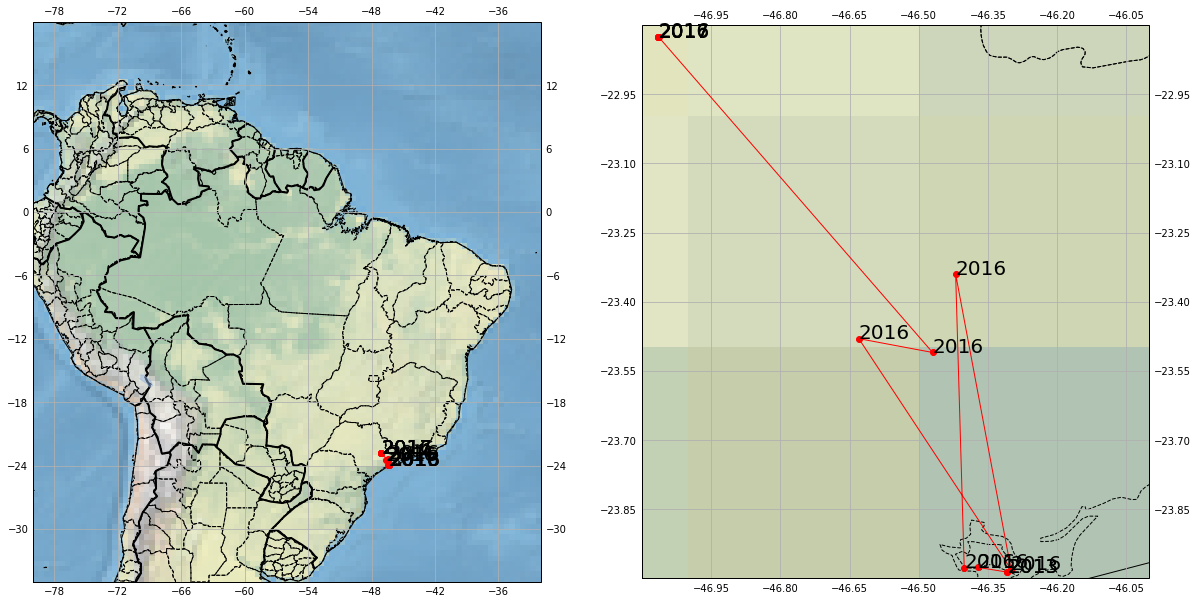

In [28]:
#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 18], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)




#Add pontos e linhas ao mapa
plt.plot(args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").lon,
         args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").lat,
         linewidth = 1,
         linestyle = '--',
         color  = 'r',
         marker = 'o',
         transform = ccrs.Geodetic())
#Add ano de coleta ao mapa
for date in args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").itertuples():
    plt.text(date.lon, 
             date.lat, 
             date.year, 
             transform = ccrs.Geodetic(),
             horizontalalignment = 'left',
             fontsize = 20)

    
    
    
#Zoom
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax2.stock_img()
ax2.set_extent([-47.1,-46,-24,-22.8], crs=ccrs.PlateCarree())
#Add features ao mapa
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.gridlines(draw_labels=True)

#Add pontos e linhas ao mapa
plt.plot(args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").lon,
         args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").lat,
         linewidth = 1,
         linestyle = '-',
         color  = 'r',
         marker = 'o',
         transform = ccrs.Geodetic())

#Add ano de coleta ao mapa
for date in args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").itertuples():
    plt.text(date.lon, 
             date.lat, 
             date.year, 
             transform = ccrs.Geodetic(),
             horizontalalignment = 'left',
             fontsize = 20)    
plt.savefig("mcr1-1.png", dpi = 200)
plt.show()


<b>Retira os genes selecionados</b> 

In [29]:
file_arg = open("mcr-1.1.fasta","w")
for genome_files in args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").itertuples():
    for record in SeqIO.parse(f"/home/tiago/documentos/sentinel/genomasbrasil/{genome_files.file}","genbank"):
        if record.id.split(".")[0] == genome_files.sequence:
            #Encontrar start e and
            start = genome_files.start - 1
            end = genome_files.end + 1
            #Separando por fitas
            if genome_files.strand == "-":
                file_arg.write(f">{record.id}_{genome_files.file}_{genome_files.year}\n")
                file_arg.write(f"{record.seq[start:end].reverse_complement()}\n")
            else:
                file_arg.write(f">{record.id}_{genome_files.file}_{genome_files.year}\n")
                file_arg.write(f"{record.seq[start:end]}\n")
file_arg.close()

In [30]:
from Bio.Align.Applications import MuscleCommandline

In [31]:
cline = MuscleCommandline(input = "mcr-1.1.fasta", out = "mrc.aln")

In [32]:
print(cline)

muscle -in mcr-1.1.fasta -out mrc.aln
